# Clustering - Métricas de Evaluación

En esta segunda parte, vamos a trabajar con las métricas para determinar la bondad del proceso de clustering. Primero importamos todas las librerias que vamos a usar.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
#from sklearn.datasets.samples_generator import make_blobs, make_moons
from sklearn.datasets import make_blobs, make_moons

sns.set()

Ahora vamos a generar nuevamente datasets. Recuerden que estos son datasets sintéticos, de los cuales ya sabemos de antemano la etiqueta que traen. El proceso de clustering nos permite identificar grupos que compartirían etiquetas cuando NO las conocemos y, en algunos casos, tampoco conocemos la cantidad de clases.

1. Generamos dos dataset del tipo Blobs. Ambos con 2000 samples y 2 features. Uno con mayor desviación que el otro.

In [2]:
n_samples = 2000
n_centros = 8

X1, y1 = make_blobs(n_samples=n_samples, centers=n_centros, cluster_std=0.3, n_features=2, random_state=0)
X2, y2 = make_blobs(n_samples=n_samples, centers=n_centros, cluster_std=0.6, n_features=2, random_state=2)

# Preparamos un dataset con clusters que no sean simétricos
random_state = 170
X, y3 = make_blobs(n_samples=n_samples, centers=n_centros, cluster_std=0.6, random_state=3)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X3 = np.dot(X, transformation)

2. Graficamos los datasets

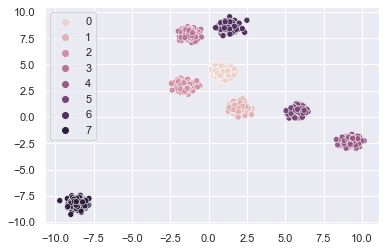

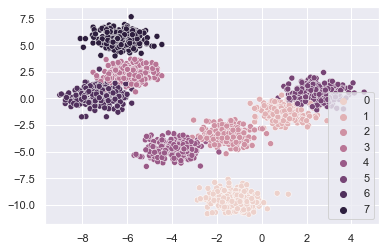

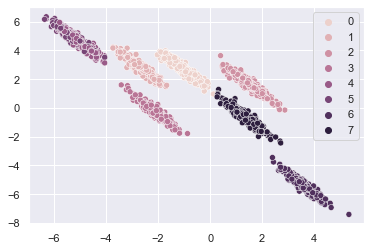

In [3]:
sns.scatterplot(x = X1[:,0], y = X1[:,1], hue = y1, legend ='full')
plt.show()
sns.scatterplot(x = X2[:,0], y = X2[:,1], hue = y2, legend ='full')
plt.show()
sns.scatterplot(x = X3[:,0], y = X3[:,1], hue = y3, legend ='full')
plt.show()

## Distancia al centroide

Vamos a evaluar las particiones que realizamos mediante KMeans usando la distancia al centroide. La idea es que al variar el número de clúster K en el modelo, el valor de la distancia media de los datos al centroide más cercano va a variar. Queremos graficar esa curva para elegir el número de particiones óptimos con el metodo del codo.

3. Preparamos una lista con las distancias medias a los centroides en el dataset 1. Vamos a probar un número de clústers que va de 2 a 14.

In [4]:
# Preparamos una lista donde vamos a ir agregando las distancias medias
Sum_of_squared_distances = []
# Fiteammos un modelo para cada numero de cluster que queremos testear
K = np.arange(2,14)
for k in K:
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k)
    km = km.fit(X1)
    # Calculamos la distancia media y agregamos a la lista
    distancia_total = km.inertia_
    distancia_media = np.divide(distancia_total,X1.shape[0])
    Sum_of_squared_distances.append(distancia_media)

4. Graficamos la distancia media en función del núemro de clústers.

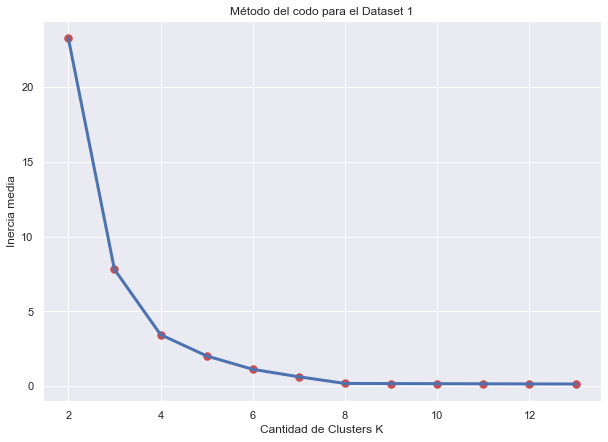

In [5]:
plt.figure(figsize = (10,7))
plt.plot(K, Sum_of_squared_distances, lw=3)
plt.scatter(K, Sum_of_squared_distances,s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Inercia media')
plt.title('Método del codo para el Dataset 1')

plt.show()

5. Repita el gráfico, pero esta vez para los datasets 2 y 3. Recomendamos copiar el código anterior y modificarlo.

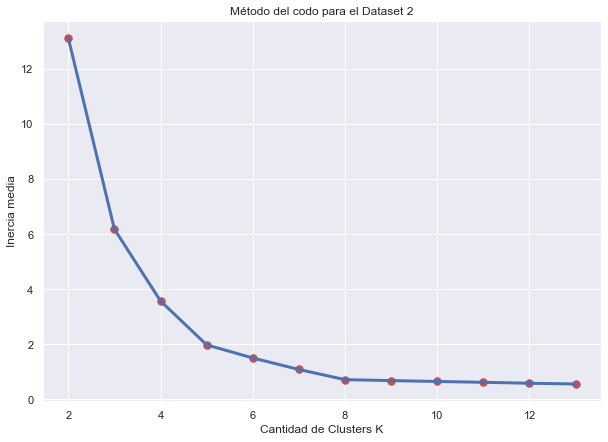

In [6]:
# Preparamos una lista donde vamos a ir agregando las distancias medias
Sum_of_squared_distances = []
# Fiteammos un modelo para cada numero de cluster que queremos testear
for k in K:
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k)
    km = km.fit(X2)
    # Calculamos la distancia media y agregamos a la lista
    distancia_total = km.inertia_
    distancia_media = np.divide(distancia_total,X2.shape[0])
    Sum_of_squared_distances.append(distancia_media)
    
plt.figure(figsize = (10,7))
plt.plot(K, Sum_of_squared_distances, lw=3)
plt.scatter(K, Sum_of_squared_distances,s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Inercia media')
plt.title('Método del codo para el Dataset 2')

plt.show()

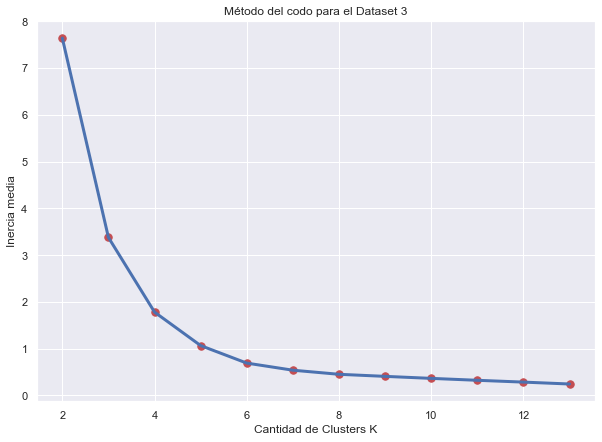

In [7]:
# Preparamos una lista donde vamos a ir agregando las distancias medias
Sum_of_squared_distances = []
# Fiteammos un modelo para cada numero de cluster que queremos testear
for k in K:
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k)
    km = km.fit(X3)
    # Calculamos la distancia media y agregamos a la lista
    distancia_total = km.inertia_
    distancia_media = np.divide(distancia_total,X3.shape[0])
    Sum_of_squared_distances.append(distancia_media)
    
plt.figure(figsize = (10,7))
plt.plot(K, Sum_of_squared_distances, lw=3)
plt.scatter(K, Sum_of_squared_distances,s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Inercia media')
plt.title('Método del codo para el Dataset 3')

plt.show()

6. Usar el criterio para elegir el mejor numero de k en cada caso según la curva y graficar los clusters para cada dataset. Dejamos como ejemplo el dataset 3, donde de la curva tomamos el valor 6 como codo.

C:\Users\lopez\miniconda3\envs\ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lopez\miniconda3\envs\ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


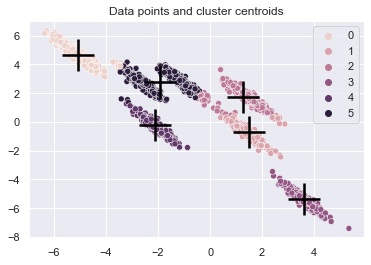

In [9]:
# Defino y entreno el modelo
km = KMeans(n_clusters=6)
km = km.fit(X3)
# Obtengo la posición de los centros y las etiquetas
etiquetas_ = km.labels_
centros_ = km.cluster_centers_
# Plotting the cluster centers and the data points on a 2D plane
sns.scatterplot(X3[:, 0], X3[:, -1], hue = etiquetas_)
sns.scatterplot(centros_[:, 0], centros_[:, 1],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

In [10]:
km.labels_

array([1, 1, 5, ..., 3, 5, 1])

## Silhouette

Vamos a evaluar las particiones que realizamos mediante el valor de silhouette. La idea es que al variar los parámetros de los modelos de clustering, cambiará la distribución del valor de Silhouettes en los datos. Con esa distribución debemos elegir los mejores parametros posibles.

7. Primero vamos a calcular únicamente el valor de silhouette promedio para distintos valores de K. La manera de hacerlo es igual a la que usamos para calcular los valores de distancia media, vamos a recorrer con un `for` los distintos modelos e ir agregando a una lista los valores. Esta vez, en lugar de calcular la distancia, vamos a calcular el valor de silhouette usando la función `silhouette_score`. Dejamos como ejemplo lo que sucede para el Dataset 2.


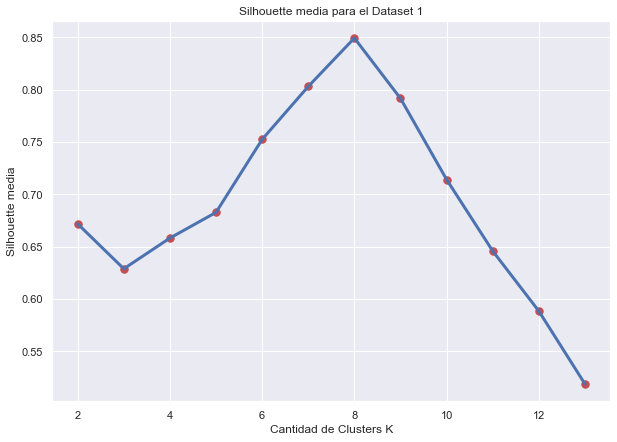

In [15]:
# Preparamos una lista donde vamos a ir agregando los valores medios de silhouette
lista_sil = []
# Fiteammos un modelo para cada numero de cluster que queremos testear
for k in range(2,14):
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k)
    km = km.fit(X1)
    
    # Tomamos las etiquetas
    etiquetas = km.labels_
    
    # Calculamos el silhouette 
    valor_medio_sil = silhouette_score(X1, etiquetas)
    lista_sil.append(valor_medio_sil)
    
plt.figure(figsize = (10,7))
plt.plot(K, lista_sil, lw=3)
plt.scatter(K, lista_sil,s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Silhouette media')
plt.title('Silhouette media para el Dataset 1')

plt.show()

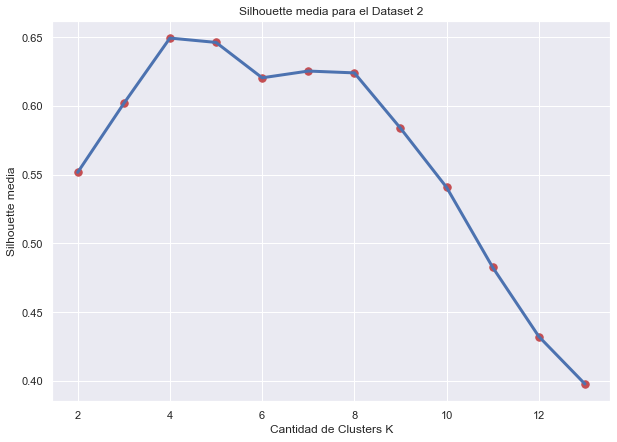

In [17]:
# Preparamos una lista donde vamos a ir agregando los valores medios de silhouette EN EL DATASET 1
lista_sil = []
# Fiteammos un modelo para cada numero de cluster que queremos testear
for k in range(2,14):
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k)
    km = km.fit(X2)
    
    # Tomamos las etiquetas
    etiquetas = km.labels_
    
    # Calculamos el silhouette 
    valor_medio_sil = silhouette_score(X2, etiquetas)
    lista_sil.append(valor_medio_sil)
    
plt.figure(figsize = (10,7))
plt.plot(K, lista_sil, lw=3)
plt.scatter(K, lista_sil,s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Silhouette media')
plt.title('Silhouette media para el Dataset 2')

plt.show()

8. Repetir esta curva para los datasets 1 y 3.

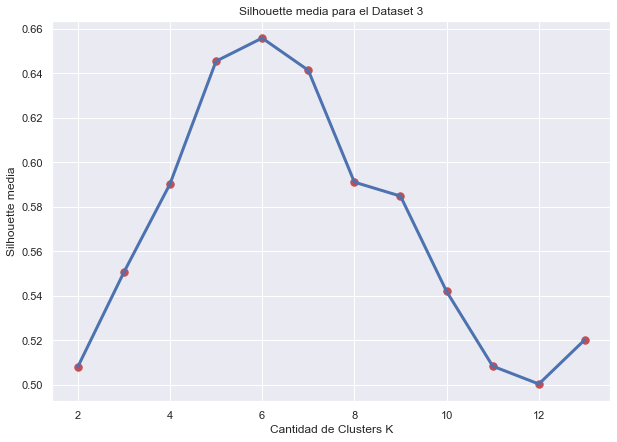

In [18]:
# Preparamos una lista donde vamos a ir agregando los valores medios de silhouette EN EL DATASET 3
lista_sil = []
# Fiteammos un modelo para cada numero de cluster que queremos testear
for k in range(2,14):
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k)
    km = km.fit(X3)
    
    # Tomamos las etiquetas
    etiquetas = km.labels_
    
    # Calculamos el silhouette 
    valor_medio_sil = silhouette_score(X3, etiquetas)
    lista_sil.append(valor_medio_sil)
    
plt.figure(figsize = (10,7))
plt.plot(K, lista_sil, lw=3)
plt.scatter(K, lista_sil,s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Silhouette media')
plt.title('Silhouette media para el Dataset 3')

plt.show()

9. A modo demostrativo, les dejaremos un bloque de código que genera los gráficos de Silhouette para todas las instancias. Noten que pueden sacar información de qué tan buenas fueron las particiones del perfil de silhouettes de cada cluster. La línea verde punteada indica el valor medio.

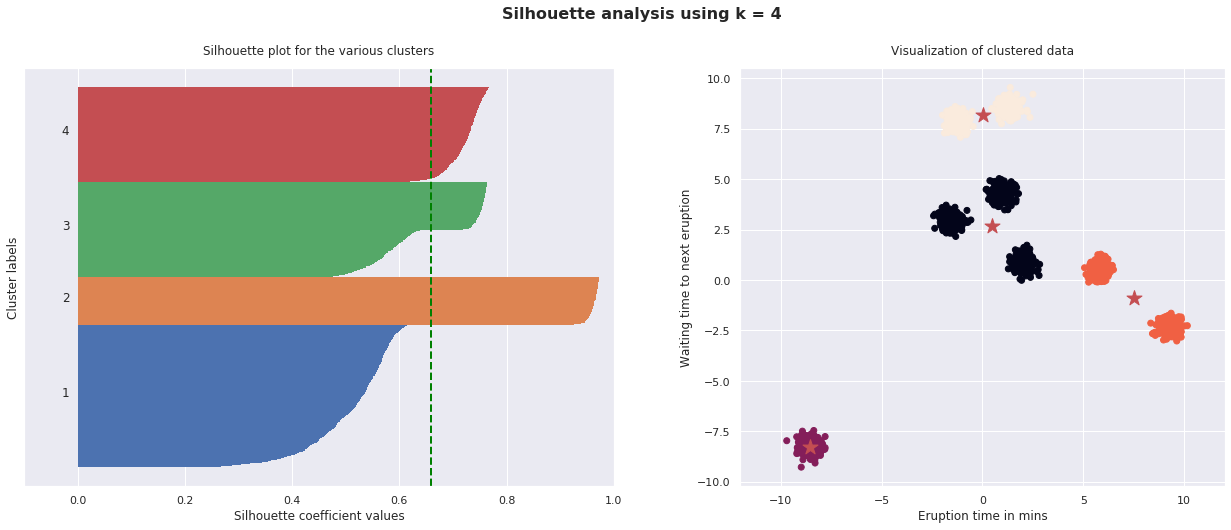

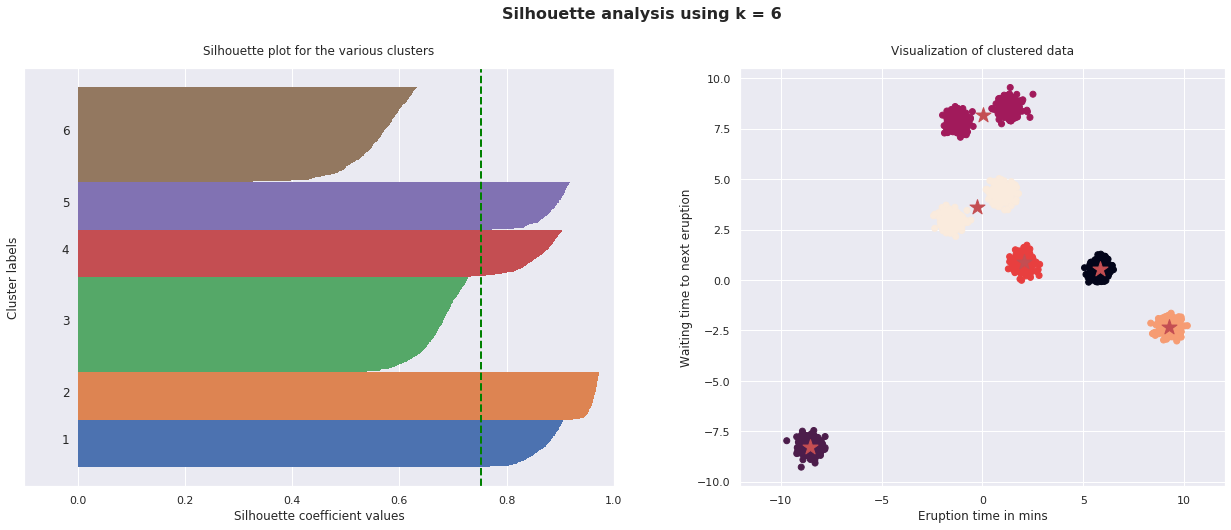

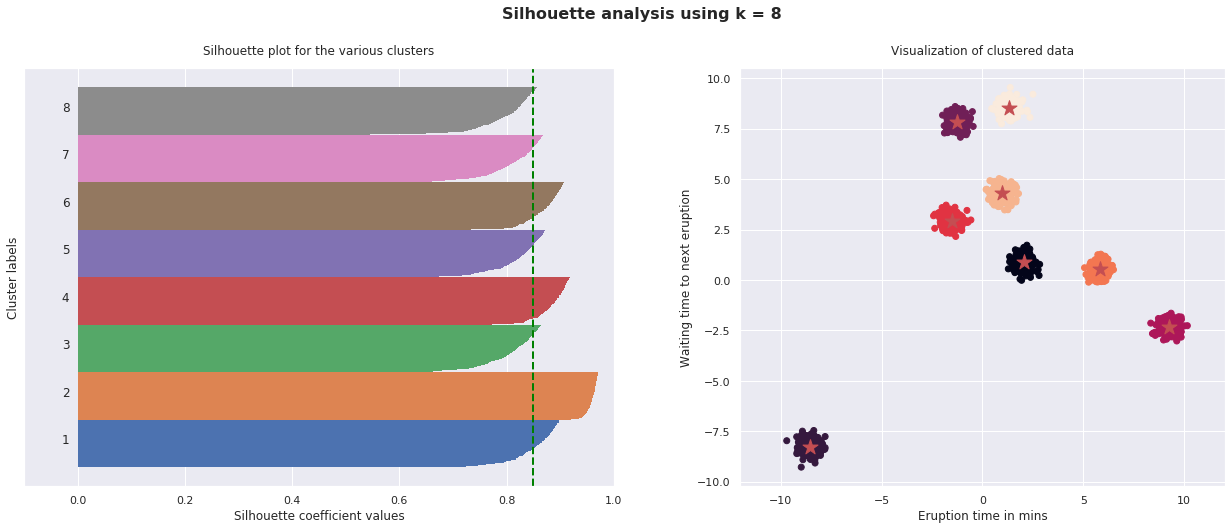

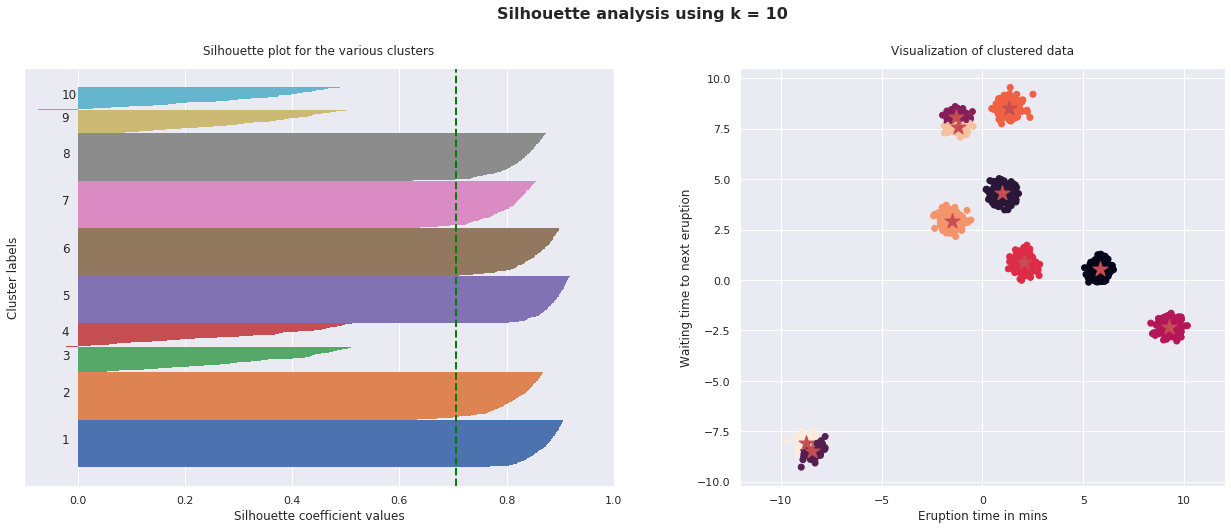

In [15]:
# Aca ponen el Dataset con el que quieren trabajar
X_std = X1
# Aca definen la lista de ks para los cuales quieren hacer un gráfico
lista_k = [4, 6, 8, 10]

for i, k in enumerate(lista_k):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_std)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_std, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-12, 12])
    ax2.set_xlim([-12, 12])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

In [19]:
from sklearn.cluster import DBSCAN
# En este paso tenemos que definir el epsilon y en min_samples, los parametros del método.
db = DBSCAN(eps=0.5, min_samples=10)#eps=0.3, min_samples=10
db.fit(X1)

DBSCAN(min_samples=10)

In [20]:
# Consultamos las etiquetas
labels_db = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_db = len(set(labels_db)) - (1 if -1 in labels_db else 0)
n_noise_db = list(labels_db).count(-1)

In [21]:
print('Estimated number of clusters: %d' % n_clusters_db)
print('Estimated number of noise points: %d' % n_noise_db)

Estimated number of clusters: 8
Estimated number of noise points: 2


In [22]:
# Funcion para plotear, NO CAMBIAR NADA
def plot_DBSCAN(X1,labels_1,db_1,n_clusters_1):
    # Armamos una mascara, con unos en los datos que son CORES.
    core_samples_mask_1 = np.zeros_like(db_1.labels_, dtype=bool)
    core_samples_mask_1[db_1.core_sample_indices_] = True
    # Plot result

    # Black removed and is used for noise instead.
    unique_labels = set(labels_1)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels_1 == k)

        xy = X1[class_member_mask & core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X1[class_member_mask & ~core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)
    plt.title('Estimated number of clusters: %d' % n_clusters_1)
    plt.show()
    return

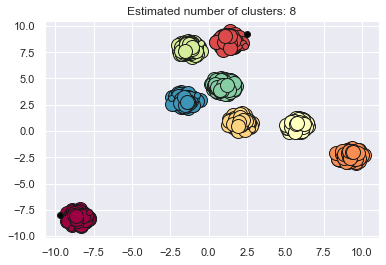

In [23]:
plot_DBSCAN(X1,labels_db,db,n_clusters_db)

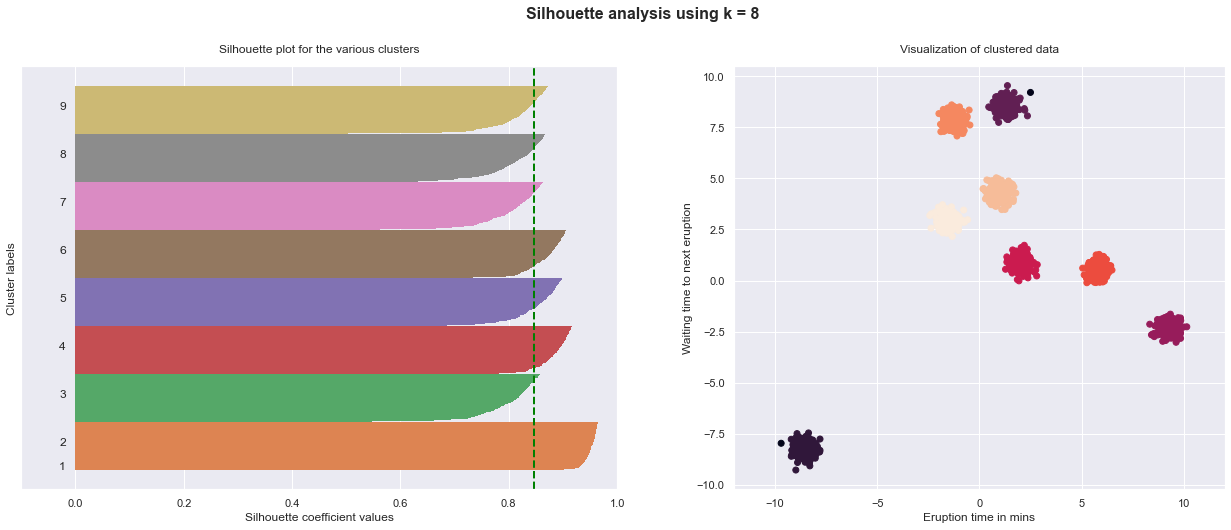

In [24]:
# Aca ponen el Dataset con el que quieren trabajar
X_std = X1
#n_clusters_db

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

labels = db.labels_

# Get silhouette samples
silhouette_vals = silhouette_samples(X_std, labels)

# Silhouette plot
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(labels)):
    cluster_silhouette_vals = silhouette_vals[labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
    y_lower += len(cluster_silhouette_vals)

# Get the average silhouette score and plot it
avg_score = np.mean(silhouette_vals)
ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
ax1.set_yticks([])
ax1.set_xlim([-0.1, 1])
ax1.set_xlabel('Silhouette coefficient values')
ax1.set_ylabel('Cluster labels')
ax1.set_title('Silhouette plot for the various clusters', y=1.02);

# Scatter plot of data colored with labels
ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
#ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
ax2.set_xlim([-12, 12])
ax2.set_xlim([-12, 12])
ax2.set_xlabel('Eruption time in mins')
ax2.set_ylabel('Waiting time to next eruption')
ax2.set_title('Visualization of clustered data', y=1.02)
ax2.set_aspect('equal')
plt.tight_layout()
plt.suptitle(f'Silhouette analysis using k = {n_clusters_db}',
             fontsize=16, fontweight='semibold', y=1.05);

## EXTRA: Compresión de Imagen

Como un extra les dejamos un pequeño algoritmo para comprimir imágenes usando K-means. 

IDEA en pocas palabras: en lugar de usar todos los colores posibles (combinaciones de 0 a 255 de los tres valores de Red Blue y Green) usamos una cantidad limitada que nosotros elegimos mediante un algoritmo de clustering.

Explicación: Tomamos como datasets todos los pixeles, y los ponemos en el espacio de los tres valores de R G y B. y luego hacemos un proceso de clustering con K-means. La idea es que, en lugar de usar la escala de 0 a 255 en RGB para representar la imagen, usamos los valores de los K centroides. El sustento detrás de este método es que pixeles cercanos en la foto tendrán valores muy parecidos de RGB, con algún mínimo cambio. Por ejemplo, de haber una pared blaca en el fondo, todos los pixeles correspondientes a esa pared estaran muy cerca del (255,255,255) que es el Blanco puro en RGB. En lugar de usar un valor distinto para cada uno de estos pixeles, usamos un unico valor para definir el colo de todos ellos.

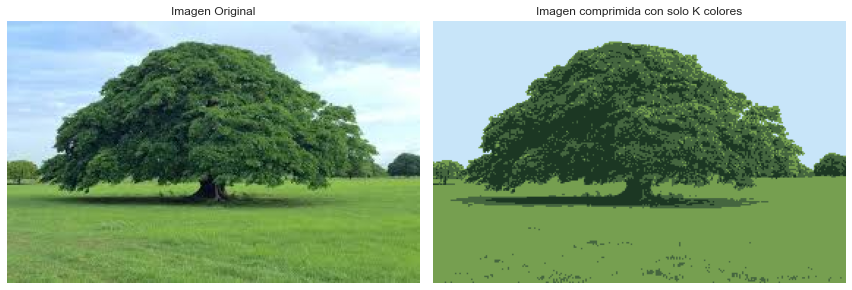

In [30]:
from matplotlib.image import imread

# Leemos la imagen obejtivo
img = imread('../DataSets/arbol.jpg')
img_size = img.shape

# Definimos el numero de Clusters (colores) a usar
K= 4

# Cambiamos sus dimensiones para que nos queden como instancias (filas) los pixeles
# y como features (columnas) el valor correspondiente a Red, Blue y Green de cada uno.
X = img.reshape(img_size[0] * img_size[1], img_size[2])

# Corremos el algoritmo de clustering
km = KMeans(n_clusters=K)
km.fit(X)

# Usamos los centroides para comprimir la imagen

# Armamos un nuevo X donde en lugar de valores cualquiera en RGB ponemos alguno de los K clusters
X_compressed = km.cluster_centers_[km.labels_]

# Por las dudas nos aseguramos que los valores esten en la unidad y el rango correcto para una imagen jpg
X_compressed = np.clip(X_compressed.astype('uint8'), 0, 255)

# Volvemos la imagen a la forma original que debe tener
X_compressed = X_compressed.reshape(img_size[0], img_size[1], img_size[2])

# Graficamos las imagenes una al lado de la otra
fig, ax = plt.subplots(1, 2, figsize = (12, 8))
ax[0].imshow(img)
ax[0].set_title('Imagen Original')
ax[1].imshow(X_compressed)
ax[1].set_title('Imagen comprimida con solo K colores')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout();